In [27]:
!pip install statsmodels --quiet

In [61]:
import numpy as np
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [29]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

In [30]:
np.mean(heights)

np.float64(170.6969696969697)

In [31]:
np.std(heights)

np.float64(4.648133209409457)

In [32]:
ztest_heights, p_value = ztest(heights, value = 170)

In [33]:
ztest_heights, p_value

(np.float64(0.8482235371587619), np.float64(0.3963134914218349))

In [34]:
alpha = 0.05

if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Н0 не може бути відхилена.


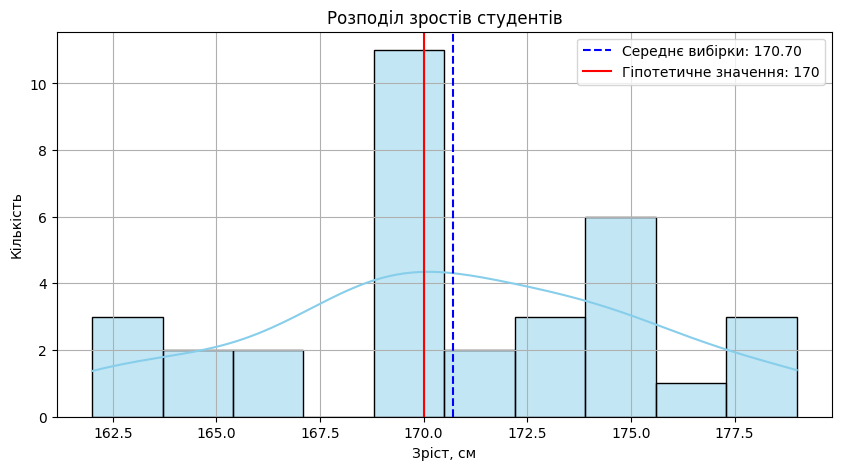

In [36]:
mean_height = np.mean(heights)

# Побудова графіка
plt.figure(figsize=(10, 5))
sns.histplot(heights, bins=10, kde=True, color='skyblue', edgecolor='black')

# Додамо лінії:
plt.axvline(mean_height, color='blue', linestyle='--', label=f'Середнє вибірки: {mean_height:.2f}')
plt.axvline(170, color='red', linestyle='-', label='Гіпотетичне значення: 170')

# Підписи
plt.title('Розподіл зростів студентів')
plt.xlabel('Зріст, см')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()

Спостереження:

Оскільки p-value = 0.396 > 0.05, ми не відхиляємо нульову гіпотезу.
Це означає, що середній зріст вибірки не відрізняється статистично значуще від 170 см.

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [37]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [38]:
np.mean(group_a_scores), np.mean(group_b_scores)

(np.float64(77.08125), np.float64(74.73875000000001))

In [45]:
z_test_group, p_value = ztest(group_a_scores, group_b_scores, alternative='larger')

In [46]:
z_test_group, p_value

(np.float64(2.357354864751502), np.float64(0.009202824276264005))

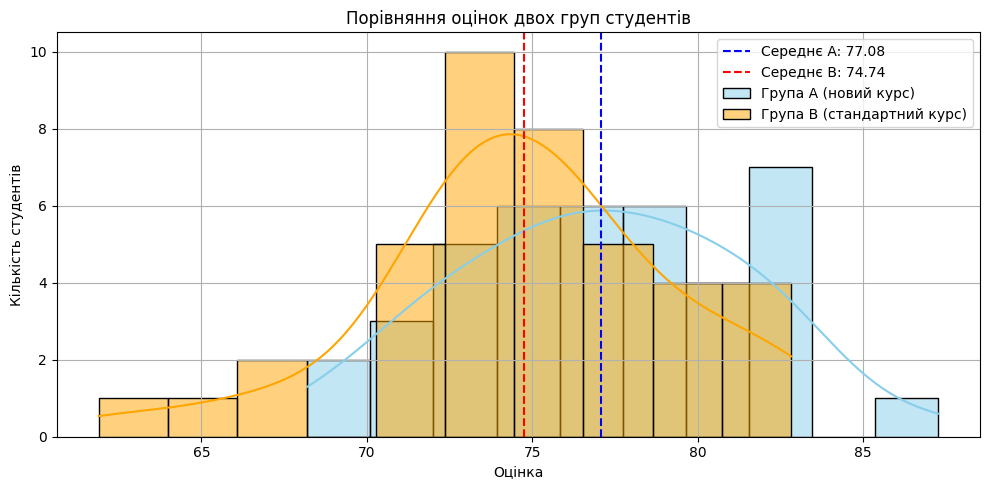

In [44]:
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)

# Графік
plt.figure(figsize=(10, 5))
sns.histplot(group_a_scores, bins=10, kde=True, color='skyblue', label='Група A (новий курс)', edgecolor='black')
sns.histplot(group_b_scores, bins=10, kde=True, color='orange', label='Група B (стандартний курс)', edgecolor='black')

# Лінії середніх
plt.axvline(mean_a, color='blue', linestyle='--', label=f"Середнє A: {mean_a:.2f}")
plt.axvline(mean_b, color='red', linestyle='--', label=f"Середнє B: {mean_b:.2f}")

# Оформлення
plt.title('Порівняння оцінок двох груп студентів')
plt.xlabel('Оцінка')
plt.ylabel('Кількість студентів')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Спостереження:

Середнє значення A більше ніж В,
p-value = 0.018 < 0.05? — тому відхиляємо гіпотезу нульову гіпотезу.
Значить: так, новий курс справді ефективніший (і ми можемо це стверджувати статистично)

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [48]:
group_a_small = group_a_scores[:5]  # Перші 5 учнів
group_b_full = group_b_scores       # Вся група B

In [49]:
print(group_a_small)
print(group_b_scores)

[78.55, 72.25, 79.88, 75.0, 76.54]
[81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82, 61.9, 79.11, 75.44, 73.5, 75.46, 65.06, 73.9, 76.79, 82.39, 72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84, 71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92, 72.9, 73.29, 70.99, 74.19]


In [50]:
t_test, p_value_ttest = ttest_ind(group_a_small, group_b_full, equal_var=False)

In [51]:
t_test, p_value_ttest

(np.float64(1.1226527301193456), np.float64(0.3010736990344312))

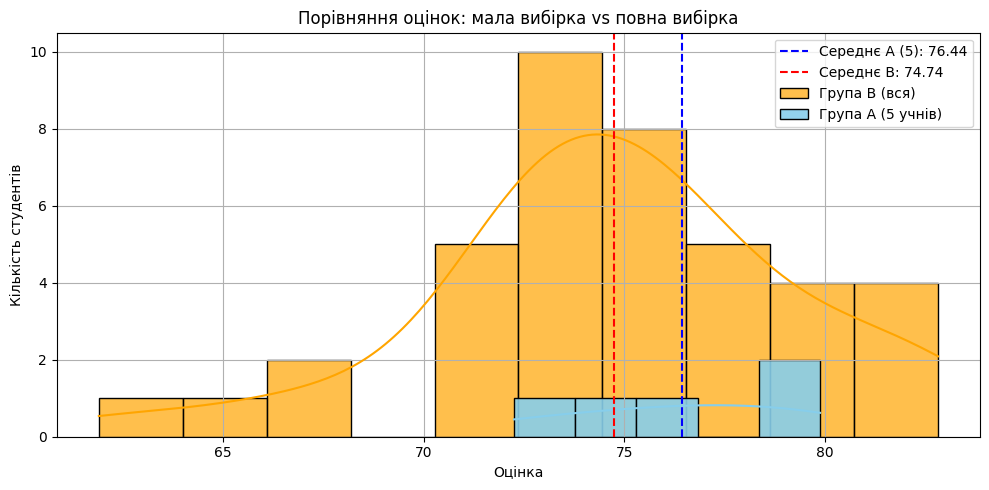

In [52]:
# Обчислення середніх
mean_a_small = np.mean(group_a_small)
mean_b_full = np.mean(group_b_full)

# Побудова графіку
plt.figure(figsize=(10, 5))
sns.histplot(group_b_full, bins=10, kde=True, color='orange', label='Група B (вся)', edgecolor='black', alpha=0.7)
sns.histplot(group_a_small, bins=5, kde=True, color='skyblue', label='Група A (5 учнів)', edgecolor='black', alpha=0.9)

# Лінії середніх
plt.axvline(mean_a_small, color='blue', linestyle='--', label=f"Середнє A (5): {mean_a_small:.2f}")
plt.axvline(mean_b_full, color='red', linestyle='--', label=f"Середнє B: {mean_b_full:.2f}")

# Оформлення
plt.title('Порівняння оцінок: мала вибірка vs повна вибірка')
plt.xlabel('Оцінка')
plt.ylabel('Кількість студентів')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Спостереження:

Оскільки ми мали лише 5 результатів у групі A, було проведено t-тест.
Отримане значення p-value = 0.30, що більше за 0.05,
тому ми не можемо відхилити нульову гіпотезу.
Таким чином, на цьому етапі немає статистично значущої різниці між групами.


### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі справробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [55]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [56]:
np.mean(before_training), np.mean(after_training)

(np.float64(50.885999999999996), np.float64(54.03600000000001))

In [63]:
t_stat, p_value = ttest_rel(after_training, before_training, alternative='greater')

In [64]:
t_stat, p_value

(np.float64(9.13890009623916), np.float64(2.4429368127512243e-10))

Середнє значення до тренінгу: 50.89, після: 54.04.
Проведений парний t-тест дав p-value ≈ 2.4e-10, що значно менше 0.05.

Отже, ми відхиляємо нульову гіпотезу і можемо зробити висновок:
Тренінг статистично значуще покращив продуктивність працівників.